# Assignment 2 of Reproducible Research
##### Note: Few of the output are deleted and commented. The reason is document can be easily readerable 

### Import Library

In [57]:
library(ggplot2) 
library(dplyr)
library(plyr)

### Download data in zip format and unzip
#### The data for this assignment come in the form of a comma-separated-value file compressed via the bzip2 algorithm to reduce its size. You can download the file from the course web site:

##### Dataset: [Storm Data](https://d396qusza40orc.cloudfront.net/repdata%2Fdata%2FStormData.csv.bz2)

In [58]:
download.file('https://d396qusza40orc.cloudfront.net/repdata%2Fdata%2FStormData.csv.bz2','storm.csv.bz2',method = "auto", quiet=FALSE)

#unzip("storm.zip")

### Read Data in CSV
#### 1. Load the data 
#### 2. Process/transform the data (if necessary) into a format suitable for your analysis

In [59]:
my_data <- read.csv("storm.csv.bz2")
#str(my_data)
#dim(my_data)

### Variables we are interested 
#### Health variables:
* FATALITIES
* INJURIES

#### Economic variables:
* PROPDMG
* PROPDMGEXP
* CROPDMG
* CROPDMGEXP

#### Events - target variable:
* EVTYPE

In [60]:
vars <- c( "EVTYPE", "FATALITIES", "INJURIES", "PROPDMG", "PROPDMGEXP", "CROPDMG", "CROPDMGEXP")
data <- my_data[, vars]

#### Checking for NA values 

In [61]:
sum(is.na(data$FATALITIES))
sum(is.na(data$INJURIES))
sum(is.na(data$PROPDMG))
sum(is.na(data$CROPDMG))
sum(is.na(data$PROPDMGEXP))
sum(is.na(data$CROPDMGEXP))

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

#### Divide the hold data set into the groups 
* Hail
* Heat
* Flood
* Wind
* Storm
* Snow
* Tornado
* Winter
* Rain

In [62]:
data$EVENT <- "OTHER"
data$EVENT[grep("HAIL", data$EVTYPE, ignore.case = TRUE)] <- "HAIL"
data$EVENT[grep("HEAT", data$EVTYPE, ignore.case = TRUE)] <- "HEAT"
data$EVENT[grep("FLOOD", data$EVTYPE, ignore.case = TRUE)] <- "FLOOD"
data$EVENT[grep("WIND", data$EVTYPE, ignore.case = TRUE)] <- "WIND"
data$EVENT[grep("STORM", data$EVTYPE, ignore.case = TRUE)] <- "STORM"
data$EVENT[grep("SNOW", data$EVTYPE, ignore.case = TRUE)] <- "SNOW"
data$EVENT[grep("TORNADO", data$EVTYPE, ignore.case = TRUE)] <- "TORNADO"
data$EVENT[grep("WINTER", data$EVTYPE, ignore.case = TRUE)] <- "WINTER"
data$EVENT[grep("RAIN", data$EVTYPE, ignore.case = TRUE)] <- "RAIN"
#sort(table(data$EVENT), decreasing = TRUE)

In [63]:
data$PROPDMGEXP <- as.character(data$PROPDMGEXP)

#### If any NA replace it with 0

In [64]:
data$PROPDMGEXP[is.na(data$PROPDMGEXP)] <- 0

##### Remove all the values except Thousand, Million, Billion dollars

In [65]:
data$PROPDMGEXP[!grepl("K|M|B", data$PROPDMGEXP, ignore.case = TRUE)] <- 0

#### Convert character to numeric for analysis

In [66]:
data$PROPDMGEXP[grep("K", data$PROPDMGEXP, ignore.case = TRUE)] <- "3"
data$PROPDMGEXP[grep("M", data$PROPDMGEXP, ignore.case = TRUE)] <- "6"
data$PROPDMGEXP[grep("B", data$PROPDMGEXP, ignore.case = TRUE)] <- "9"
data$PROPDMGEXP <- as.numeric(as.character(data$PROPDMGEXP))
data$property.damage <- data$PROPDMG * 10^data$PROPDMGEXP

#### Same preprocessing of data (CROPDMGEXP)


In [67]:
data$CROPDMGEXP <- as.character(data$CROPDMGEXP)
data$CROPDMGEXP[is.na(data$CROPDMGEXP)] <- 0
data$CROPDMGEXP[!grepl("K|M|B", data$CROPDMGEXP, ignore.case = TRUE)] <- 0
data$CROPDMGEXP[grep("K", data$CROPDMGEXP, ignore.case = TRUE)] <- "3"
data$CROPDMGEXP[grep("M", data$CROPDMGEXP, ignore.case = TRUE)] <- "6"
data$CROPDMGEXP[grep("B", data$CROPDMGEXP, ignore.case = TRUE)] <- "9"
data$CROPDMGEXP <- as.numeric(as.character(data$CROPDMGEXP))
data$crop.damage <- data$CROPDMG * 10^data$CROPDMGEXP

### 1. Across the United States, which types of events are most harmful with respect to population health?
#### Plot top 10 reason for Death and Injury 

In [68]:
Death <- aggregate(data$FATALITIES, by = list(data$EVENT), FUN = sum)
colnames(Death) <- c("EVENT", "Death")
Death <- Death[order(Death$Death, decreasing = TRUE),][1:10,]

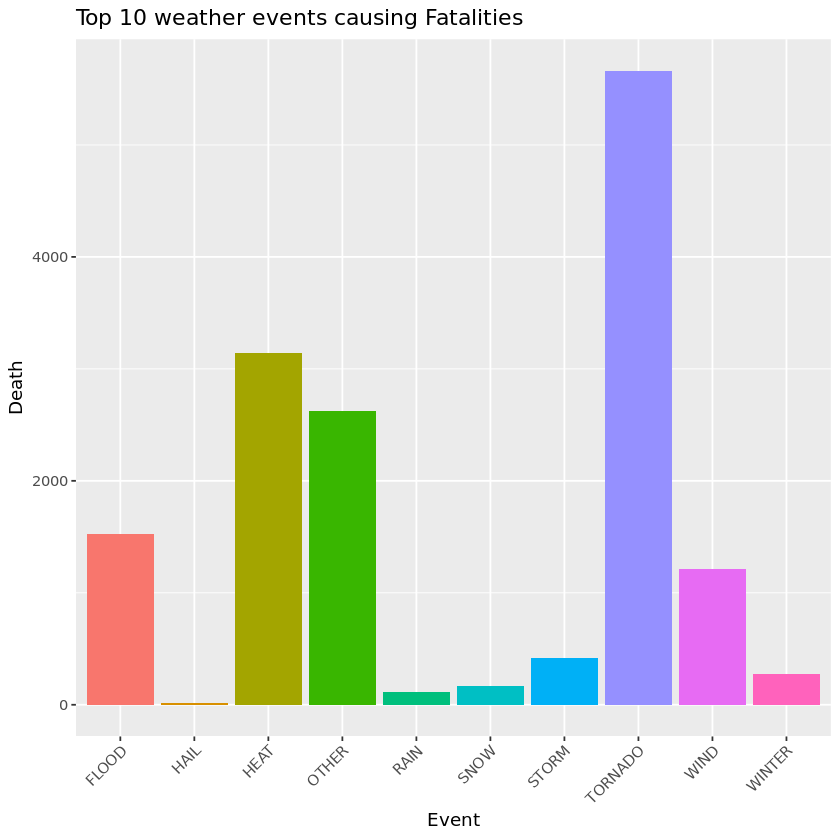

In [69]:
ggplot() + geom_bar(data = Death, aes(x = EVENT, 
    y = Death, fill = interaction(Death, EVENT)), stat = "identity", 
    show.legend = F) + theme(axis.text.x = element_text(angle = 45, hjust = 1)) + 
    xlab("Event") + ylab("Death") + ggtitle("Top 10 weather events causing Fatalities")

In [70]:
INJURIES <- aggregate(data$INJURIES, by = list(data$EVENT), FUN = sum)
colnames(INJURIES) <- c("EVENT", "INJURIES")
INJURIES <- INJURIES[order(INJURIES$INJURIES, decreasing = TRUE),][1:10,]

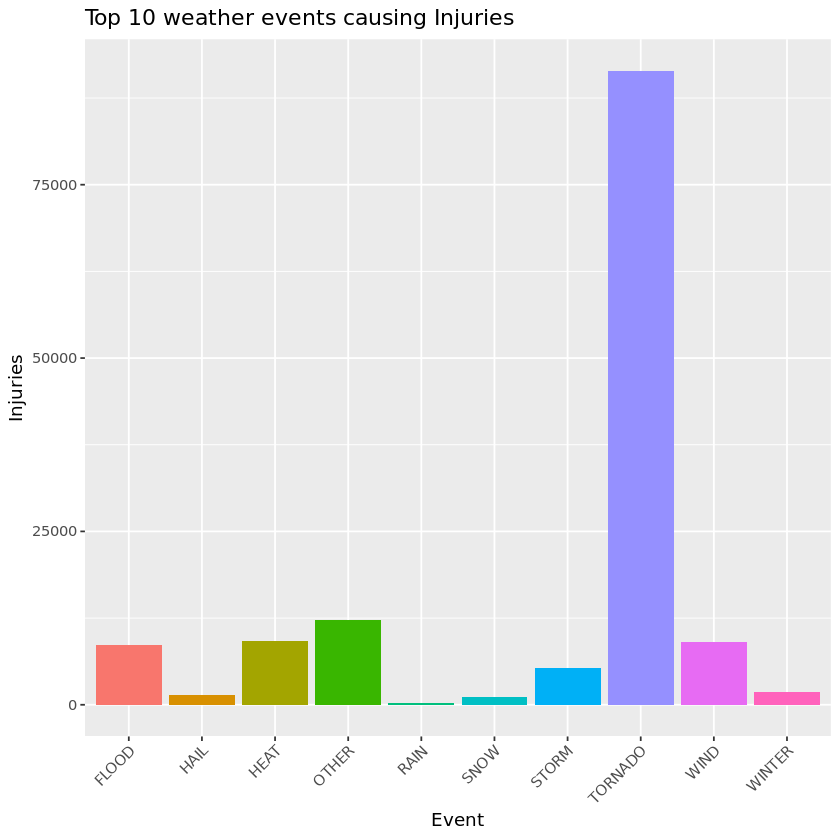

In [71]:
ggplot() + geom_bar(data = INJURIES, aes(x = EVENT, y = INJURIES, fill = interaction(INJURIES, EVENT)), stat = "identity", 
                    show.legend = F) + theme(axis.text.x = element_text(angle = 45, hjust = 1)) + xlab("Event") + 
ylab("Injuries") + ggtitle("Top 10 weather events causing Injuries")

### 2. Across the United States, which types of events have the greatest economic consequences?
#### Two types of damage property and crop which would be plotted

In [72]:
Property <- aggregate(data$property.damage, by = list(data$EVENT), FUN = sum)
colnames(Property) <- c("EVENT", "Property")
Property <- Property[order(Property$Property, decreasing = TRUE),][1:10,]

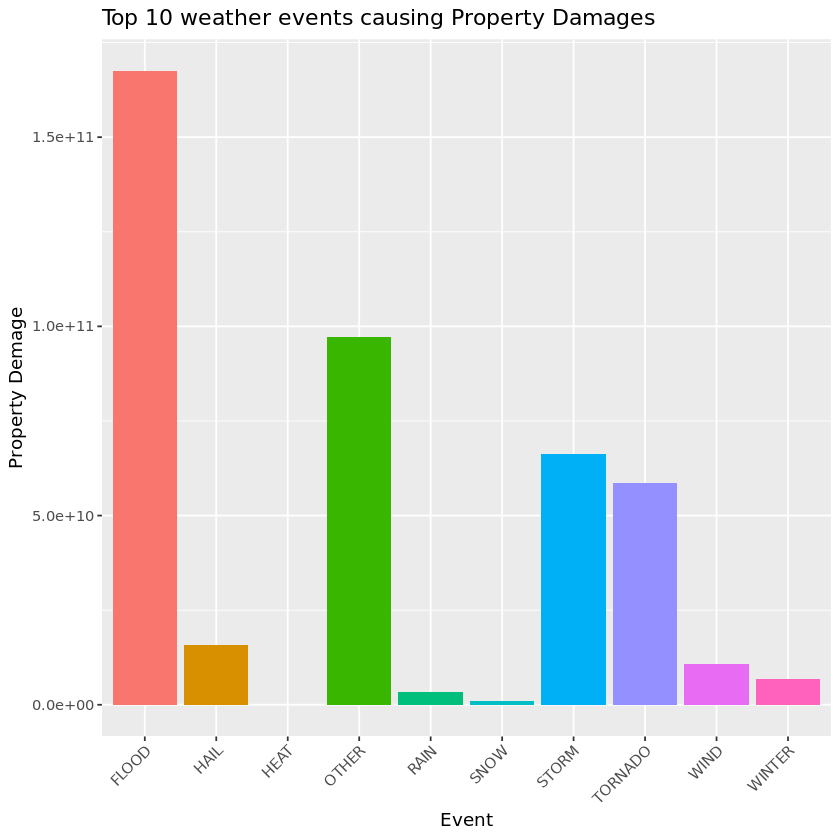

In [73]:
ggplot() + geom_bar(data = Property, aes(x = EVENT, y = Property, fill = interaction(Property, EVENT)), stat = "identity", 
                    show.legend = F) + theme(axis.text.x = element_text(angle = 45, hjust = 1)) + xlab("Event") + 
ylab("Property Demage") + ggtitle("Top 10 weather events causing Property Damages")

In [74]:
Crop <- aggregate(data$crop.damage, by = list(data$EVTYPE), FUN = sum)
colnames(Crop) <- c("EVENT", "Crop")
Crop <- Crop[order(Crop$Crop, decreasing = TRUE),][1:10,]

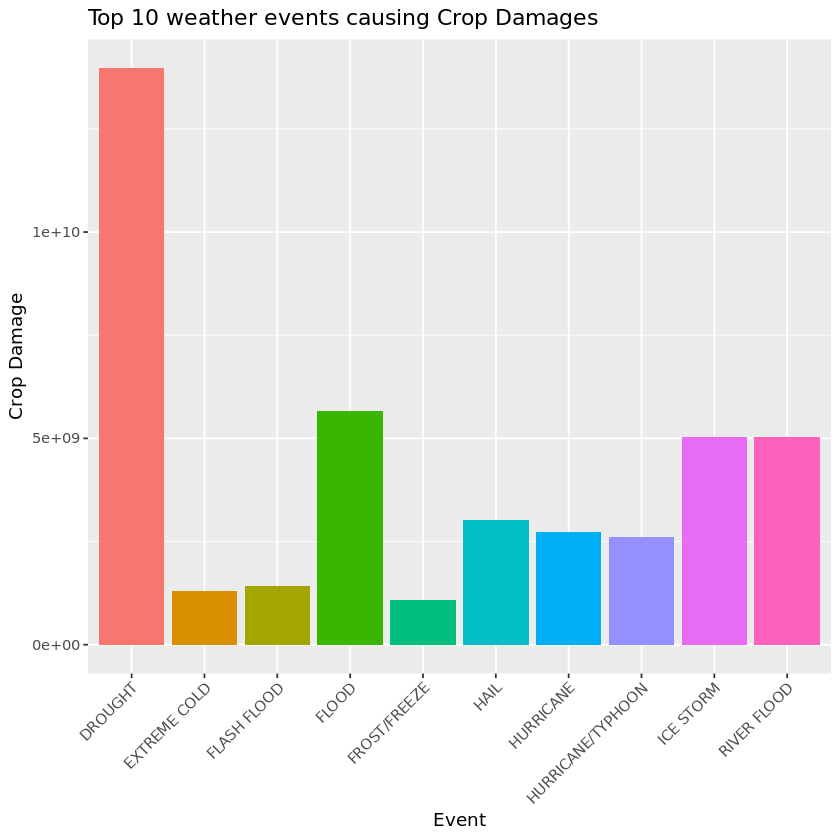

In [75]:
ggplot() + geom_bar(data = Crop, aes(x = EVENT, y = Crop, fill = interaction(Crop, EVENT)), stat = "identity", 
                    show.legend = F) + theme(axis.text.x = element_text(angle = 45, hjust = 1)) + xlab("Event") + 
ylab("Crop Damage") + ggtitle("Top 10 weather events causing Crop Damages")

## Result

* First & Second plot shows that Death and Injury is most due to Tornado.
* Third plot illustrates majority demage of property is due to Flood.
* Fourth plot shows that Drought is event due to which Crop are demaged.